# Pokemon

In this dataset you will explore data related to [Pokemon](https://en.wikipedia.org/wiki/Pok%C3%A9mon). This dataset is from Kaggle:

https://www.kaggle.com/abcsds/pokemon

Before getting started, it is recommended that you read a bit about Pokemon and the variables in this dataset in the links above.

## Imports

In [13]:
import numpy as np
import pandas as pd
import altair as alt
from io import StringIO
alt.enable_mime_rendering()

## Data

Let's import that dataset as a `DataFrame`:

In [14]:
data = pd.read_csv('/data/pokemon/Pokemon.csv')
data=data[data['#']<151]

In [15]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Rename columns to get rid of spaces in the names:

In [16]:
name_map = {'Type 1': 'Type1', 'Type 2': 'Type2', 'Sp. Atk': 'SpAtk', 'Sp. Def': 'SpDef'}
data.rename(columns=name_map, inplace=True)

In [17]:
data.head()
data.columns

Index(['#', 'Name', 'Type1', 'Type2', 'Total', 'HP', 'Attack', 'Defense',
       'SpAtk', 'SpDef', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

## Exploratory data analysis

Your task is to explore this dataset using the tools we have learning in the class. The format is centered around questions. For each of the two sections, you should have the following:

1. Start with a question. It is likely that your question will evolve as you explore the dataset. You should put your question in its own markdown cell at the beginning of the section.
2. Perform transformations and visualizations to explore the question. You can create as many code cell as you need to explore the dataset. **For each question, create at least 2 visualizations.**
3. Answer the question based on your explorations. This should be done in a Markdown cell after the code.

Your work will be graded using the following criteria:

* The complexity and significance of your question.
* How effectively your code explores and answers the question.
* The complexity of the transformations/visualizations performed to answer the question. It should be complex enough to be interesting and answer a significant question, but not overly complex.
* The effectiveness of visualizations you perform, including using appropriate visual encodings.
* How well you answer the question after exploring the data with code.

## Question 1

Create as many cells as you need below this one to explore propose, explore and answer your first question.

Which type of Pokemon would win the most battles based on type and attack strength?

Modelling a Pokemon battle:

Obtain the names the Pokemon battles(only one on one supported at this time).

Multiply 'Total' attack power by the type modifier: 1.5 for super effective, and 0.5 for not very effective.

Compare the adjusted attacks. Theoretically, the one with the greater adjusted attack should win. 

Sum the number of wins for each Pokemon to calculate the most successful Pokemon.

In [18]:
types = pd.read_csv(StringIO("""Attacking,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
Normal,1,1,1,1,1,1,1,1,1,1,1,1,0.5,0,1,1,0.5,1
Fire,1,0.5,0.5,1,2,2,1,1,1,1,1,2,0.5,1,0.5,1,2,1
Water,1,2,0.5,1,0.5,1,1,1,2,1,1,1,2,1,0.5,1,1,1
Electric,1,1,2,0.5,0.5,1,1,1,0,2,1,1,1,1,0.5,1,1,1
Grass,1,0.5,2,1,0.5,1,1,0.5,2,0.5,1,0.5,2,1,0.5,1,0.5,1
Ice,1,0.5,0.5,1,2,0.5,1,1,2,2,1,1,1,1,2,1,0.5,1
Fighting,2,1,1,1,1,2,1,0.5,1,0.5,0.5,0.5,2,0,1,2,2,0.5
Poison,1,1,1,1,2,1,1,0.5,0.5,1,1,1,0.5,0.5,1,1,0,2
Ground,1,2,1,2,0.5,1,1,2,1,0,1,0.5,2,1,1,1,2,1
Flying,1,1,1,0.5,2,1,2,1,1,1,1,2,0.5,1,1,1,0.5,1
Psychic,1,1,1,1,1,1,2,2,1,1,0.5,1,1,1,1,0,0.5,1
Bug,1,0.5,1,1,2,1,0.5,0.5,1,0.5,2,1,1,0.5,1,2,0.5,0.5
Rock,1,2,1,1,1,2,0.5,1,0.5,2,1,2,1,1,1,1,0.5,1
Ghost,0,1,1,1,1,1,1,1,1,1,2,1,1,2,1,0.5,1,1
Dragon,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,0.5,0
Dark,1,1,1,1,1,1,0.5,1,1,1,2,1,1,2,1,0.5,1,0.5
Steel,1,0.5,0.5,0.5,1,2,1,1,1,1,1,1,2,1,1,1,0.5,2
Fairy,1,0.5,1,1,1,1,2,0.5,1,1,1,1,1,1,2,2,0.5,1"""))

In [19]:
pokemon_attack = data.merge(types, left_on='Type1', right_on='Attacking')
def adjusted_attack(attacker,defender):
    attacker_type=pokemon_attack[pokemon_attack['Name']==attacker]['Type1'].iloc[0]
    defender_adjusted_attack=(pokemon_attack[pokemon_attack['Name']==defender]['Total']*pokemon_attack[attacker_type].iloc[0]).values[0]
    defender_type=pokemon_attack[pokemon_attack['Name']==defender]['Type1'].iloc[0]
    attacker_adjusted_attack=(pokemon_attack[pokemon_attack['Name']==attacker]['Total']*pokemon_attack[defender_type].iloc[0]).values[0]
    return attacker_adjusted_attack,defender_adjusted_attack

In [20]:
win_list=[]
for attacker in pokemon_attack['Name']:
    wincount=0
    for defender in pokemon_attack['Name']:
        attacker_adjusted, defender_adjusted =adjusted_attack(attacker,defender)
        if(defender_adjusted>attacker_adjusted):
            wincount=wincount+1
    win_list.append(wincount)
win_list=np.array(win_list)
print(win_list)
pokemon_attack['wins']=win_list

[ 46  29   8   2  45  32  20  49  35  20  43  10  26  47  29   7   0   0
  52  11  40   6  28  14  18   8   5 157 141 119 106 153 129 159 144 126
 150 124 156 133 113 151 135 158 120 151 135 162 139 153 137 149 123 164
 116 104 118 120  94  88  32  94  88  32  18  59  29  48  24  14  14   3
 128  98  75  57 127  87 122  84 116  86 114  85  97 107  77  96  83  67
  53  67 115 101  93  62  58  25  60  38  11  61  38  11  67  23  43  14
  41  20 104  71 101  76  99  74  67  63  55 159 137 163 141 153 140 148
 134 103  72 111  79 111  90  64  79  79 107  92  65  53 100  72  77  41
  35  35 159 143 130 144 146 130 146 130 124 110 107  90  65  49  79  55
  49  27   3]


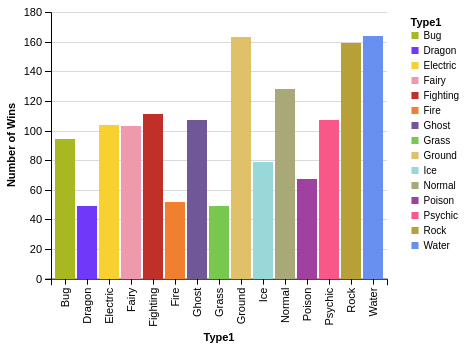

In [21]:
pokemon_attack.head()
alt.Chart(pokemon_attack).mark_bar().encode(
    x='Type1',
    y=alt.Y('wins',title='Number of Wins'),
    color=alt.Color('Type1:N',
        scale=alt.Scale(
            range=['#A8B820', '#7038F8', '#F8D030', '#EE99AC', '#C03028',
                   '#F08030', '#705898', '#78C850', '#E0C068', '#98D8D8',
                   '#A8A878', '#A040A0', '#F85888', '#B8A038', '#6890F0',
                   '#B6A136', '#B7B7CE', '#6390F0'],
        ),
    ),
)

Therefore, in a world with only Gen1 Pokemon, and where Pokemon battles are truly randomly distributed, the best party would contain Pokemon from the Ground, Rock, and Water types. 

## Question 2

Create as many cells as you need below this one to explore propose, explore and answer your first question.

In the original TV Show Pokemon, Ash Ketchum defeats the gym leader of Pewter City Gym by hitting a water sprinkler, causing water to rain down on the gym leader's rock type Pokemon, hurting them. This outraged many a fans, as they thought that Ash cheated, relying on luck, instead of diversifying his Pokemon party in order to gain a type advantage or training/ fostering his Pokemon to grow stronger.   

I'm going to analyse, on the basis of Ash's party at Pewter gym, if he would have been able to beat Brock without "cheating".  

Assumptions: 

same levels, same HP

if a pokemon survives a round, it's health is replenished, and it can fight another round. The first person to deplete their pokemon loses

Ash: Caterpie, Pikachu

Brock: Geodude, Onix

In [22]:
data = pd.read_csv('/data/pokemon/Pokemon.csv')
pokemon_pewter = data[data['#'] <= 95]
ash_party=[pokemon_pewter.iloc[30],pokemon_pewter.iloc[13]]
brock_party=[pokemon_pewter.iloc[80],pokemon_pewter.iloc[103]]
while(len(ash_party)!=0 and len(brock_party)!=0):
    print(ash_party[0]['Name'], 'vs ', brock_party[0]['Name'])
    ash_attack,brock_attack=adjusted_attack(ash_party[0]['Name'],brock_party[0]['Name'])
    if(ash_attack>brock_attack):
        brock_party.pop(0)
    elif(ash_attack<brock_attack):
        ash_party.pop(0)
    else:
        ash_party.pop(0)
        brock_party.pop(0)
if(len(ash_party)>len(brock_party)):
    print("Ash wins")
elif(len(ash_party)<len(brock_party)):
    print("brock wins")
else:
    print("it's a tie")

Pikachu vs  Geodude
Pikachu vs  Onix
Ash wins


Therefore, theoretically, Ash could have won even without the water sprinklers.

Which Generation of Pokemon is the strongest? Do legendaries effect the number a lot?

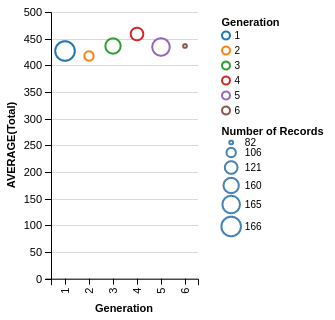

In [23]:
data = pd.read_csv('/data/pokemon/Pokemon.csv')
alt.Chart(data).mark_point().encode(
    x='Generation:N',
    y='average(Total):Q',
    color=alt.Color('Generation:N'),
    size='count(Legendary)'
)

Answer: The fourth generation of Pokemon is the strongest yet, even though it is first generation that has the greatest number of legendary pokemon.

In [24]:
assert True # Leave this cell unchanged as the last cell in the section as a placeholder for grading